## Ciao raga

Elisabetta ti odio  solo per il fatto che non leggerai mai questo codice.
Ciao Antonino.nfjdshfuidsfcewd
Ciao **SIMONINI**fdjfdsj


aggiungo altre coseeeeee
altre cose per prova


provo di nuovo





In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy import odr
# import iminuit
# from iminuit import Minuit

In [63]:
df = pd.read_excel(
    r"C:\Users\dario\OneDrive\Desktop\università\Laurea_Magistrale\Laboratorio_4\Esperienze_lab\Esperienza1\Misura_Kb_tensione_copia.xlsx",
    usecols="E:J",
    nrows = 20
)
c = df["Capacità misurata (nF)"]
err_c = df["Err C (nF)"]
v = df["V2 (V)"]
err_v = df["Err V ( V)"]

c_rev = 1 / c
err_c_rev = err_c/ c**2


In [64]:
df

,Capacità (pF),Capacità misurata (nF),1/C,V2 (V),Err C (nF),Err V ( V)
0,10000,9.770,0.102354,1.196,0.048850,0.05980
1,13300,12.720,0.078616,1.184,0.063600,0.05920
2,4700,4.486,0.222916,1.600,0.022430,0.08000
3,22000,22.800,0.043860,1.000,0.114000,0.05000
4,33000,35.710,0.028003,1.306,0.178550,0.06530
5,7800,6.743,0.148302,1.476,0.033715,0.07380
6,6600,6.029,0.165865,1.475,0.030145,0.07375
7,78000,74.880,0.013355,1.007,0.374400,0.05035
8,68000,62.400,0.016026,1.023,0.312000,0.05115
9,5600,4.612,0.216826,1.731,0.023060,0.08655


Il modello è $y = a x + b$ 

 $V_2 = \frac{K_B T}{U^* C}$

 con $y = V_2$,  $a = \frac{K_B T}{U^* C}$ ,  x = 1/C

 supponiamo che:

- $T = 25 °C = 300 K$
- $U^* = \frac{U_m}{Y^2} \frac{R_1}{R_1 + R_2} \frac{R_V + R_{av}}{R_V}$
 con $U_m = 10 V,  Y = 1.01·10^6 , R_2 = 9R_1, R_{av} = 1.5 M \Omega $


Fit lineare con Minuit nel caso in cui gli errori sulle x siano effettivamente trascurabili


 ### FIT LINEARE NEL CASO IN CUI NON SIANO TRASCURABILI GLI ERRORI SULLE X

In [65]:
T  = 300 
U_star = 10/(1.01 * 10**6)**2 /10 * 1 # aggiustare, non so il valoroe di R_V

def linear_func(B, x):
        return B[0] * x + B[1]

def fit_lineare(x,y, errx, erry):
    
    

    linear_model = odr.Model(linear_func) 

    data = odr.RealData(x, y, sx=errx, sy= erry)

    fit = odr.ODR(data, linear_model, beta0=[1, 0])  # parametri iniziali [pendenza, intercetta]

    output = fit.run()
    par, cov = output.beta, output.cov_beta
    dev_std = output.sd_beta
    
    return par, dev_std
 
 


In [66]:
par, dev_std = fit_lineare(c_rev, v, err_c_rev, err_v)
print(f"coefficiente angolare m = {par[0]:.2f} +- {dev_std[0]:.2f} ")
print(f"intercetta q = {par[1]:.2f} +- {dev_std[1]:.2f} ")
print(dev_std)

coefficiente angolare m = 3.09 +- 0.55 
intercetta q = 1.03 +- 0.05 
[0.55498107 0.04580143]


Text(0, 0.5, 'V (V)')

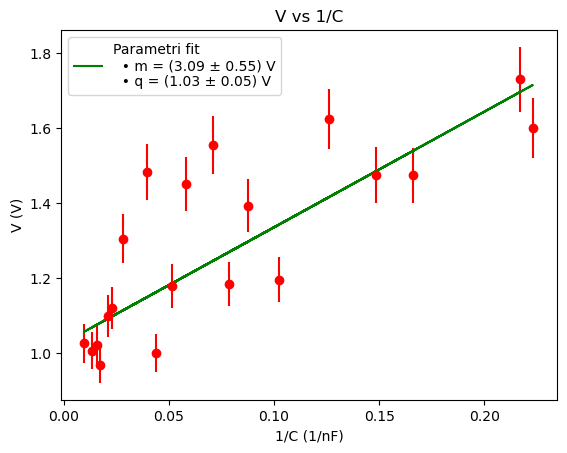

In [67]:
plt.errorbar(c_rev, v, yerr = err_v, xerr = err_c_rev,fmt = "o", color = "red")
label_fit = (
    "Parametri fit"
    "\n  • " + f"m = ({par[0]:.2f} ± {dev_std[0]:.2f}) V"
    "\n  • " + f"q = ({par[1]:.2f} ± {dev_std[1]:.2f}) V"
)
plt.plot(
    c_rev,
    linear_func(par, c_rev),
    color="green",
    label=label_fit)
plt.title("V vs 1/C")
plt.xlabel("1/C (1/nF)")
plt.legend()
plt.ylabel("V (V)")

## Algoritmo per la convergeza di K_B

Nota bene: in questo processo vanno DIVISI  per $Z$ i valori ORIGINARIAMENTE misurati di $V_2$

In [68]:
print(list(c))
# print(c)

[9.77, 12.72, 4.486, 22.8, 35.71, 6.743, 6.029, 74.88, 62.4, 4.612, 14.05, 11.39, 43.88, 25.31, 7.935, 103.7, 17.23, 19.43, 58.8, 47.6]


In [72]:
eff = 5
count = 0
iter_max = 100
eps = np.array([10.7, 9.1, 18, 6.2, 5.5, 18, 18, 6.8, 6.3, 18, 8.2, 9.7, 5.5, 5.9, 18, 8.5, 7, 6.6, 6, 5.7])
Z = 1 - eps

v_new = []
q_values = []   # lista per salvare i valori di q
m_values = []

while eff > 0.01 and count < iter_max:
    
    par, dev_std = fit_lineare(c_rev, v, err_c_rev, err_v)
    m, q = par
    q_values.append(q)  # salvo il valore di q
    m_values.append(m)  # salvo il valore di m
    
    v_new = (v - q) / Z
    
    # nuovo fit con i nuovi valori
    par1, dev_std1 = fit_lineare(c_rev, v_new, err_c_rev, err_v) 
    m1, q1 = par1
    
    eff = abs(q - q1)
    
    v = v_new.copy()
    count += 1

print(f"Convergenza raggiunta dopo {count} iterazioni: q → {q1:.3f}")

# stampa dei valori di q prima della convergenza
print("\nValori di q durante le iterazioni:")
for i, val in enumerate(q_values):
    print(f"Iterazione {i+1}: q = {val:.6f}")


Convergenza raggiunta dopo 3 iterazioni: q → -0.000

Valori di q durante le iterazioni:
Iterazione 1: q = 1.027393
Iterazione 2: q = -0.011837
Iterazione 3: q = 0.000576


In [73]:
print(q_values)
print(m_values)

[1.0273932315124599, -0.01183710377832117, 0.0005764541404596731]
[3.0866958898083636, -0.15855209519604227, 0.011765338149608789]


In [74]:
print(f"valore del coefficiente angolare = {m_values[-1]}")
print(f"kB = {m_values[-1]/T}")

valore del coefficiente angolare = 0.011765338149608789
kB = 3.92177938320293e-05
